<a href="https://colab.research.google.com/github/ImVrishank/marvel-task1-photos/blob/main/matmul_of_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image mixer

Here is the plan, i will grab two images of the same size, flatten them and then run a mat mul and get one image and print that



In [ ]:
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

Using device: cpu


In [ ]:
img1 = Image.open("hrishikesh.jpg").convert("L")
img2 = Image.open("vrishank.jpg").convert("L")

In [ ]:
img_1 = np.array(img1)
img_2 = np.array(img2)


Text(0.5, 1.0, 'Image 1 (Before)')

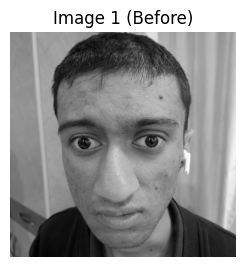

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img_1, cmap='gray')
plt.axis('off')
plt.title("Image 1 (Before)")

Text(0.5, 1.0, 'Image 2 (Before)')

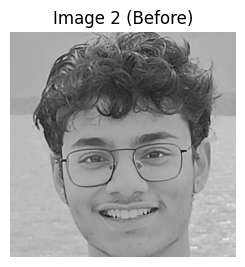

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img_2, cmap='gray')
plt.axis('off')
plt.title("Image 2 (Before)")

In [ ]:
tensor_1 = torch.tensor(img_1, dtype=torch.float32)
tensor_2 = torch.tensor(img_2, dtype=torch.float32)


In [ ]:
shape = tensor_1.shape
shape

torch.Size([960, 960])

In [ ]:
result = tensor_1 @ tensor_2.T

In [ ]:
result.shape

torch.Size([960, 960])

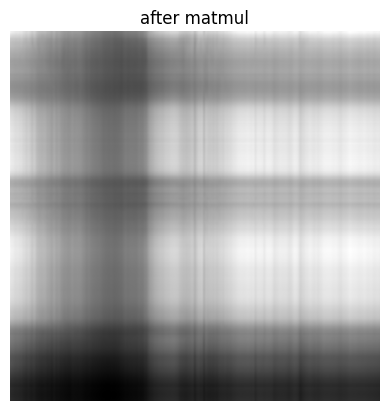

In [ ]:
import matplotlib.pyplot as plt

# Suppose 'result' is your [H, W] or [H*W, H*W] tensor
result_norm = (result - result.min()) / (result.max() - result.min())  # scale 0-1
result_np = result_norm.cpu().numpy()  # move to CPU and convert to NumPy

plt.title("after matmul")
plt.imshow(result_np, cmap='gray')  # use grayscale colormap
plt.axis('off')  # hide axes
plt.show()

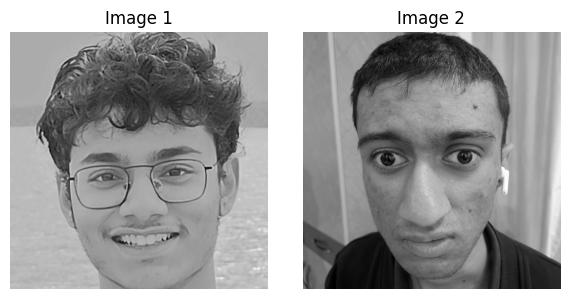

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import time
from PIL import Image

# --- Parameters ---
image_size = (128, 128)  # Reduce size to prevent RAM crash
img1_path = 'vrishank.jpg'
img2_path = 'hrishikesh.jpg'

# --- Load and preprocess images ---
def load_grayscale_image(path, size=image_size):
    img = Image.open(path).convert('L')  # Convert to grayscale
    img = img.resize(size)
    img_np = np.array(img).astype(np.float32) / 255.0  # Normalize to 0-1
    return img_np

img1_np = load_grayscale_image(img1_path)
img2_np = load_grayscale_image(img2_path)

# Display before images
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(img1_np, cmap='gray')
plt.axis('off')
plt.title('Image 1')
plt.subplot(1,2,2)
plt.imshow(img2_np, cmap='gray')
plt.axis('off')
plt.title('Image 2')
plt.tight_layout()
plt.show()

# Convert to PyTorch tensors
device = 'cuda' if torch.cuda.is_available() else 'cpu'
img1_gpu = torch.tensor(img1_np, device=device)
img2_gpu = torch.tensor(img2_np, device=device)
img1_cpu = torch.tensor(img1_np)
img2_cpu = torch.tensor(img2_np)

# --- Function for matrix multiplication ---
def matrix_multiply(img1, img2):
    H, W = img1.shape
    flat1 = img1.view(H*W, 1)
    flat2 = img2.view(1, H*W)
    return torch.matmul(flat1, flat2)

# --- CPU multiplication ---
start = time.time()
result_cpu = matrix_multiply(img1_cpu, img2_cpu)
end = time.time()
cpu_time = end - start
print(f"CPU time: {cpu_time:.4f} seconds")

# --- GPU multiplication ---
torch.cuda.synchronize() if device=='cuda' else None
start = time.time()
result_gpu = matrix_multiply(img1_gpu, img2_gpu)
torch.cuda.synchronize() if device=='cuda' else None
end = time.time()
gpu_time = end - start
print(f"GPU time: {gpu_time:.4f} seconds")

print(f"Speedup: {cpu_time/gpu_time:.2f}x")

# --- Normalize and display result ---
result_np = (result_gpu - result_gpu.min()) / (result_gpu.max() - result_gpu.min())
result_np = result_np.cpu().numpy()

plt.figure(figsize=(4,4))
plt.imshow(result_np, cmap='gray')
plt.axis('off')
plt.title('Matrix Multiplication Result')
plt.show()
